## Notebook du nettoyage des données  
Lire et Importer les Librairies

In [1]:
import pandas as pd
import numpy as np

# lire enopenfoodfactsorgproducts.csv dans un dataframe pandas
open_food = pd.read_csv("enopenfoodfactsorgproducts.csv", encoding="utf8", sep='\t')

# combien de lignes et combien de colonnes?
print("Il y a:",open_food.shape[0],"lignes et", open_food.shape[1],"colonnes dans le dataframe enopenfoodfactsorgproducts.csv.")


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,12,26,27,28,30,51,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Il y a: 1524579 lignes et 183 colonnes dans le dataframe enopenfoodfactsorgproducts.csv.


In [55]:
def vals_manquantes(open_food):
    # nombre de valeurs manquantes pour chaque colonne 
    missing_open_food = open_food.isnull().sum()
    # pourcentage de valeurs manquantes dans open_food . 
    null_counts_pct = missing_open_food / open_food.shape[0] * 100
    # plus facile a visualiser ensemble (le nombre et le pourcentage):
    nulls_df = pd.DataFrame({'null_counts': missing_open_food, 'null_pct': null_counts_pct})
    # ranger par pourcentages
    nulls_df = nulls_df.sort_values(by = "null_pct")
    return nulls_df

nulls_df = vals_manquantes(open_food)
# fichier csv pour inspecter
#nulls_df.to_csv('missing_open_food1.csv') 


In [3]:
# fonction pour heatmap des valeurs manquantes
def make_heatmap(open_food, rot_degr, leng, height):
    import matplotlib.pyplot as plt
    import seaborn as sns

    %matplotlib inline

    fig, axes = plt.subplots(figsize=[leng,height]) 
    # heatmap des valeurs manquantes
    sns_plot = sns.heatmap(open_food.isnull(), cbar = False)
    sns.set(font_scale = 1)  
    sns_plot.set_title('Heatmap des Valeurs Manquantes', fontsize = 15)
    plt.xticks(rotation = rot_degr, fontsize = 12)
    plt.yticks(rotation = 0, fontsize = 13)
    fig = sns_plot.get_figure()
    plt.show()
    # les valeurs manquantes sont en beige, les autres valeurs sont en noir. 
    
make_heatmap(open_food, 60, 10, 6)


## Explications 
Supprimer les colonnes qui n'ont pas assez de valeurs

In [54]:
open_food2 = open_food.copy()

# inspecter le score nutrition uk pour voir si il est pertinent
nutruk_full = open_food2[open_food2['nutrition-score-uk_100g'].notnull() == True]
#nutruk_full.to_csv('nutruk_full.csv')

# pour avoir la valeur de thresh que l'on utilisera avec .dropna 
vals_pos = open_food2.notnull().sum().sort_values(ascending=False)
#vals_pos.to_csv('mostcompleted.csv')


In [56]:
# supprimer les colonnes qui n'ont pas assez d'informations
open_food2 = open_food2.dropna(axis = 1, thresh = 6000)
print("Il y a:",open_food2.shape[0],"lignes et", open_food2.shape[1],"colonnes dans le dataframe openfood.")


Il y a: 1524579 lignes et 101 colonnes dans le dataframe openfood.


## Explications
Vérifier à nouveau les valeurs manquantes, maintenant que certaines colonnes sont supprimées: faire un choix des colonnes.
Vérifier si certaines colonnes sont les mêmes. 

In [57]:
# supprimer certaines colonnes avec regex
pattern_list = [r"categories", r"_en", r"image", r"manufacturing", r"packaging", r"states", 
                r"tags", r"url"]
cols2 = open_food2.columns 

for p in pattern_list:
        nopat = cols2.str.contains(p, na=False)
        cols2 = cols2[~nopat]

# supprimer les colonnes qui présentent le pattern qui ne nous intéresse pas
open_food3 = open_food2[cols2].copy()

print(len(open_food3.columns))

In [58]:
# check duplicates pour les colonnes energy
ener_full = open_food3[open_food3["energy-kj_100g"].notnull() == True]
ener_full["energy-kj_100g"].equals(ener_full['energy_100g'])
# les colonnes sont les mêmes si l'on enlève les valeurs nulles de energy_kj_100g

True

In [59]:
# check duplicates pour la nutrition score vs score fr
open_food3["nutriscore_score"].equals(open_food3['nutrition-score-fr_100g'])

True

In [60]:
print("Il y a:",open_food3.shape[0],"lignes et", open_food3.shape[1],"colonnes dans le dataframe open_food.")
#open_food3.columns 

67
Il y a: 1524579 lignes et 67 colonnes dans le dataframe open_food.


In [61]:
nulls_df3 = vals_manquantes(open_food3)
#nulls_df3.to_csv('missing_open_food3.csv') 


## Explications
Créer un dataframe avec juste les colonnes qui nous intéressent

In [63]:
open_food4 = open_food3.copy()

open_food4 = open_food4[['code', 'creator', 
                         'created_t', 'created_datetime',
                         'product_name', 'generic_name', 'brands',
                         'stores','countries',
                         'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 
                         'nutriscore_score', 'nutriscore_grade',
                         'energy-kcal_100g','energy_100g', 
                         'fat_100g', 'saturated-fat_100g',
                         'carbohydrates_100g', 'sugars_100g',
                         'fiber_100g',
                         'proteins_100g',
                         'salt_100g', 'sodium_100g',
                         'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g']]

open_food4.reset_index(inplace=True)
print("Il y a:",open_food4.shape[0],"lignes et", open_food4.shape[1],"colonnes dans le dataframe open_food.")

Il y a: 1524579 lignes et 26 colonnes dans le dataframe open_food.


In [12]:
food_cols = open_food4.columns.tolist()
print(food_cols)

sub = open_food4.columns[12:].tolist() 
sub.append(food_cols[5])
print(sub)

sub3 = food_cols[14:-2]
print(sub3)

['index', 'code', 'creator', 'created_t', 'created_datetime', 'product_name', 'generic_name', 'brands', 'stores', 'countries', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g']
['nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g', 'product_name']
['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


In [13]:
# supprimer les lignes qui n'ont pas assez d'informations

# on supprime les lignes qui n'ont pas de nom de produit et pas d'information de nutrition
open_food4 = open_food4.dropna(axis=0, how="all", subset= sub)
print("Il y a:",open_food4.shape[0],"lignes et", open_food4.shape[1],"colonnes dans le dataframe open_food.")

# on supprime les lignes qui n'ont pas au moins 4 valeurs non nulles pour les colonnes quantitatives
open_food4 = open_food4.dropna(axis=0, how="all", subset= sub3, thresh = 5)
print("Il y a:",open_food4.shape[0],"lignes et", open_food4.shape[1],"colonnes dans le dataframe open_food.")


Il y a: 1457363 lignes et 26 colonnes dans le dataframe open_food.
Il y a: 1211156 lignes et 26 colonnes dans le dataframe open_food.


In [14]:
# vérifier les valeurs dupliquées
duplicateRowsDF = open_food4[open_food4.duplicated(keep=False)]
#duplicateRowsDF.to_csv('duplicateRowsDF.csv')

sub1 = open_food4.columns[10:].tolist()
sub1.append(open_food4.columns[2])
print(sub1)
print(len(sub1))

duplicateRowsDF = open_food4[open_food4.duplicated(sub1, keep=False)]
duplicateRowsDF = duplicateRowsDF.sort_values(by = 'energy_100g')
#duplicateRowsDF.to_csv('duplicateRowsDFcode.csv')

# supprimer les doublons (même createur et toutes les mêmes valeurs quantitatives)
open_food5 = open_food4.drop_duplicates(sub1, keep='first')
print("Il y a:",open_food5.shape[0],"lignes et", open_food5.shape[1],"colonnes dans le dataframe open_food.")


['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g', 'creator']
17
Il y a: 973765 lignes et 26 colonnes dans le dataframe open_food.


In [15]:
nulls_df5 = vals_manquantes(open_food5)
#nulls_df5.to_csv('missing_open_food5.csv')


In [16]:
open_food6 = open_food5.copy()

# si il y a un generic name, le rajouter au product name
open_food6.product_name[open_food6.generic_name.isnull() == False] = open_food5.product_name.str.cat(open_food5["generic_name"], sep = ' ', na_rep= " ")

# renommer certaines colonnes pour avoir _ au lieu de -
open_food6.rename(columns = {'saturated-fat_100g':'saturated_fat_100g'}, inplace = True)
open_food6.rename(columns = {'fruits-vegetables-nuts_100g':'fruits_vegetables_nuts_100g'}, inplace = True)
open_food6.rename(columns = {'fruits-vegetables-nuts-estimate_100g':'fruits_vegetables_nuts_estimate_100g'}, inplace = True)
open_food6.rename(columns = {'energy_100g':'energy_100g_kj'}, inplace = True)

open_food6.columns

<ipython-input-16-6f347e797bc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food6.product_name[open_food6.generic_name.isnull() == False] = open_food5.product_name.str.cat(open_food5["generic_name"], sep = ' ', na_rep= " ")


Index(['index', 'code', 'creator', 'created_t', 'created_datetime',
       'product_name', 'generic_name', 'brands', 'stores', 'countries',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'energy-kcal_100g', 'energy_100g_kj', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits_vegetables_nuts_100g', 'fruits_vegetables_nuts_estimate_100g'],
      dtype='object')

## Explications
Inspecter la correlation pour les colonnes fruits, gras etc & pour les colonnes carbon

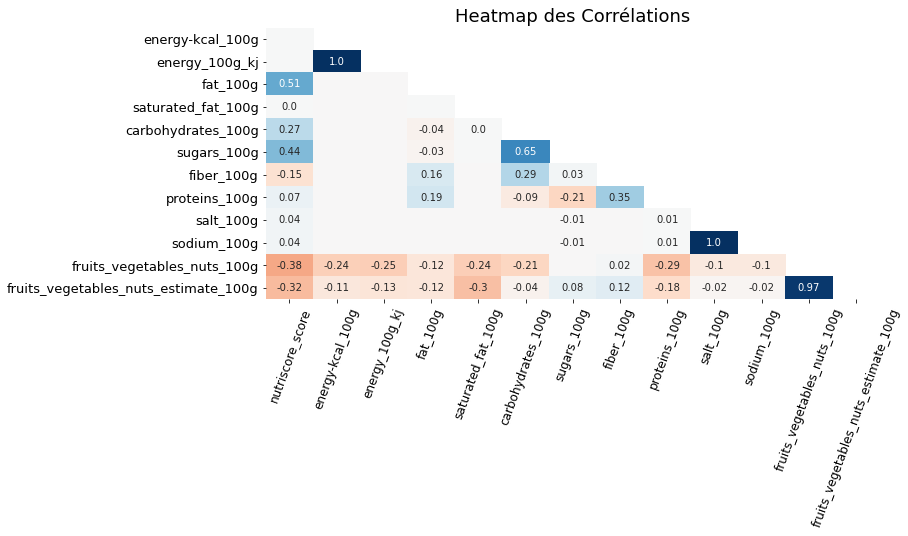

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# fonction plot_correlations() pour heatmap des corrélations
def plot_correlations(df, name_csv):
    # créer une matrice de correlation 
    cols_with_vals = df.columns[1:]
    
    # On peut calculer la relation entre deux colonnes: la correlation. 
    # on utilise la méthode dataframe.corr() 
    our_corr = df[cols_with_vals].corr()
    
    # our_corr.to_csv('{}.csv'.format(name_csv))
    our_corr = our_corr.iloc[1:]
    # créer un mask triangulaire pour ne pas répéter les valeurs et que le heatmap soit plus facile à lire
    # la fonction np.triu() nous donne une copie de la matrice avec les elements en dessous de la diagonale  
    mask = np.triu(np.ones_like(our_corr), k=1)
    
    # heatmap des valeurs
    plt.figure(figsize=(11,5))
    ax = sns.heatmap(our_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    # formatter le texte du graphique, et cacher les labels pour valeurs près de 0
    for text in ax.texts:
        t = float(text.get_text())
        if -0.005 < t < 0.005:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
    plt.xticks(rotation=70, fontsize = 12)
    plt.yticks(rotation=0, fontsize = 13)
    plt.title('Heatmap des Corrélations', fontsize = 18)
    plt.show()
    
list = ['index', 'code', 'creator', 'nutriscore_score',
       'nutriscore_grade', 'energy-kcal_100g', 'energy_100g_kj', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits_vegetables_nuts_100g', 'fruits_vegetables_nuts_estimate_100g']

plot_correlations(open_food6[list], "correlation_matrix")


In [18]:
nulls_df6 = vals_manquantes(open_food6)
#nulls_df6.to_csv('missing_open_food6.csv')


## Explications
Selon les informations que nous avons obtenues avant, nous allons supprimer certaines colonnes 

In [65]:
print(open_food6.columns)

# supprimer les colonnes qui ne nous intéressent plus 
open_food7 = open_food6.drop(['code', 'created_t', 'created_datetime',
                              'generic_name', 'brands', 'stores', 'countries',
                              'ingredients_from_palm_oil_n',
                              'ingredients_that_may_be_from_palm_oil_n'], axis=1).copy()

open_food7.columns


Index(['index', 'code', 'creator', 'created_t', 'created_datetime',
       'product_name', 'generic_name', 'brands', 'stores', 'countries',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'energy-kcal_100g', 'energy_100g_kj', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits_vegetables_nuts_100g', 'fruits_vegetables_nuts_estimate_100g'],
      dtype='object')


Index(['index', 'creator', 'product_name', 'nutriscore_score',
       'nutriscore_grade', 'energy-kcal_100g', 'energy_100g_kj', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits_vegetables_nuts_100g', 'fruits_vegetables_nuts_estimate_100g'],
      dtype='object')

In [20]:
# make_heatmap(open_food7, 40, 10, 7)


## Traitement de Valeurs Aberrantes

In [68]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = "energy_100g_kj", ascending=False)
#open_food17.head(8000).to_csv('energy_vals_check.csv')

open_food17 = open_food7.sort_values(by = 'energy-kcal_100g', ascending=False)
#open_food17.tail(80000).to_csv('energy_vals_check.csv')


Il y a: 973765 lignes et 17 colonnes dans le dataframe.


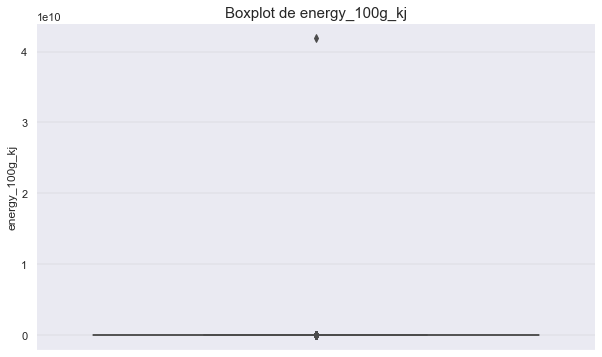

In [69]:
fig, axes = plt.subplots(figsize=[10,6]) 

def plot_boxes():
    
    #sns.set(style="whitegrid")
    
    sns_plot2 = sns.boxplot(data = open_food7, y= 'energy_100g_kj', 
                            whis=[5, 95], palette="Paired_r")

    for item in sns_plot2.get_xticklabels():
        item.set_rotation(90)

    sns_plot2.spines['top'].set_visible(False)
    sns_plot2.spines['right'].set_visible(False)
    sns_plot2.spines['left'].set_visible(False)
    
    # supprimer y-axis tick marks
    sns_plot2.yaxis.set_ticks_position('none')
    
    # rajouter major gridlines y-axis
    sns_plot2.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    sns.set(font_scale= 1.2)  
    plt.title('Boxplot de energy_100g_kj', fontsize = 15)
    
    return sns_plot2
    
sns_plot = plot_boxes()


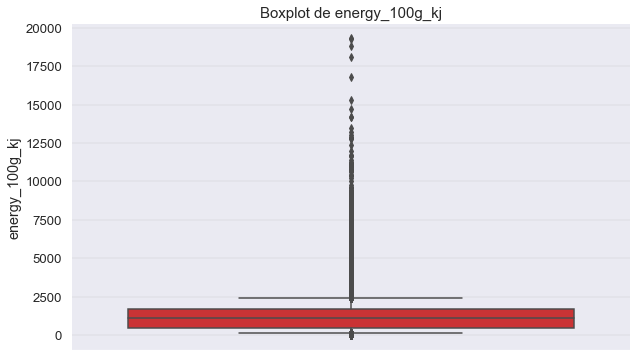

In [23]:
indexNames = open_food7[open_food7["energy_100g_kj"] > 20000.0 ].index
open_food7.drop(indexNames, inplace = True)

fig, axes = plt.subplots(figsize=[10,6]) 
sns_plot = plot_boxes()

In [24]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

# trouver le inter quartile range et vérifier quelles valeurs sont classées comme étant des outliers 
Q1 = open_food7["energy_100g_kj"].quantile(0.25)
Q3 = open_food7["energy_100g_kj"].quantile(0.75)
IQR = Q3-Q1
lower_bound1 = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound1, upper_bound)
# on n'utilise pas les lower et upper bounds qu'on a trouvé, parce que on perd trop de valeurs dans ce cas

# supprimer les lignes aberrantes
indexNames = open_food7[open_food7["energy_100g_kj"] >  3770.0 ].index
open_food7.drop(indexNames, inplace = True)

open_food7 = open_food7[open_food7.index != 1047647]

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")


Il y a: 973733 lignes et 16 colonnes dans le dataframe.
456.0 1682.0 1226.0 -1383.0 3521.0
Il y a: 970392 lignes et 16 colonnes dans le dataframe.


<ipython-input-24-d3b6cfb8893e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_food7.energy_100g_kj[open_food7["index"] == 1047647] = np.nan


In [25]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = 'fat_100g', ascending=False).copy()
#open_food17.head(900).to_csv('fat_100gcheck.csv')

# supprimer les individus aberrants
open_food7 = open_food7[open_food7.index != 1176715]
indexNames = open_food7[open_food7['fat_100g'] > 100.0].index
open_food7.drop(indexNames, inplace = True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 970392 lignes et 16 colonnes dans le dataframe.
Il y a: 970363 lignes et 16 colonnes dans le dataframe.


In [26]:
open_food17 = open_food7.sort_values(by = 'saturated_fat_100g', ascending=False)
#open_food17.head(500).to_csv('sat_fat_check.csv')

# supprimer les individus aberrants
open_food7 = open_food7[open_food7.index != 254817]
open_food7 = open_food7[open_food7.index != 173051]

indexNames = open_food7[open_food7['saturated_fat_100g'] > 100.0].index
open_food7.drop(indexNames, inplace = True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 970356 lignes et 16 colonnes dans le dataframe.


In [27]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = 'carbohydrates_100g', ascending=False)
#open_food17.head(800).to_csv('carbohydratescheck.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['carbohydrates_100g'] > 100].index
open_food7.drop(indexNames, inplace=True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")


Il y a: 970356 lignes et 16 colonnes dans le dataframe.
Il y a: 970286 lignes et 16 colonnes dans le dataframe.


In [28]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = 'sugars_100g', ascending=False)
#open_food17.head(800).to_csv('sugar_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['sugars_100g'] > 100.0].index
open_food7.drop(indexNames, inplace=True)
indexNames = open_food7[open_food7['sugars_100g'] < 0].index
open_food7.drop(indexNames, inplace=True)

open_food17 = open_food7.sort_values(by = 'sugars_100g', ascending=False)
#open_food17.head(800).to_csv('sugar_check2.csv')

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")


Il y a: 970286 lignes et 16 colonnes dans le dataframe.
Il y a: 970279 lignes et 16 colonnes dans le dataframe.


In [29]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by ='fiber_100g', ascending=False)
#open_food17.head(800).to_csv('fiber_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['fiber_100g'] > 92.0].index
open_food7.drop(indexNames, inplace=True)
indexNames = open_food7[open_food7['fiber_100g'] < 0].index
open_food7.drop(indexNames, inplace=True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 970279 lignes et 16 colonnes dans le dataframe.
Il y a: 970233 lignes et 16 colonnes dans le dataframe.


In [30]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by ='proteins_100g', ascending=False)
#open_food17.head(500).to_csv('protein_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['proteins_100g'] > 98.0].index
open_food7.drop(indexNames, inplace=True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 970233 lignes et 16 colonnes dans le dataframe.
Il y a: 970148 lignes et 16 colonnes dans le dataframe.


In [31]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = 'salt_100g', ascending=False)
#open_food17.head(4000).to_csv('salt_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['salt_100g'] >= 99.0].index
open_food7.drop(indexNames, inplace=True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 970148 lignes et 16 colonnes dans le dataframe.
Il y a: 969399 lignes et 16 colonnes dans le dataframe.


In [33]:
open_food17 = open_food7.sort_values(by = 'sodium_100g', ascending=False)
#open_food17.head(800).to_csv('sodium_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7['sodium_100g'] > 40.00].index
open_food7.drop(indexNames, inplace=True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

Il y a: 969398 lignes et 16 colonnes dans le dataframe.


In [34]:
open_food17 = open_food7.sort_values(by = 'fruits_vegetables_nuts_100g', ascending=False)
#open_food17.head(9000).to_csv('fruits_vegetables_nuts_check.csv')


In [35]:
open_food17 = open_food7.sort_values(by = 'fruits_vegetables_nuts_estimate_100g', ascending=False)
#open_food17.head(9000).to_csv('fruits_vegetables_nuts_check.csv')


In [36]:
print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")

open_food17 = open_food7.sort_values(by = "energy_100g_kj", ascending=False)
#open_food17.tail(22000).to_csv('energy_vals_tail_check.csv')

# supprimer les individus aberrants
indexNames = open_food7[open_food7["energy_100g_kj"] < 1.4 ].index
open_food7.drop(indexNames, inplace = True)

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")


Il y a: 969398 lignes et 16 colonnes dans le dataframe.
Il y a: 959151 lignes et 16 colonnes dans le dataframe.


In [37]:
nulls_df7 = vals_manquantes(open_food7)
nulls_df7.to_csv('missing_open_food7.csv')

print("Il y a:",open_food7.shape[0],"lignes et", open_food7.shape[1],"colonnes dans le dataframe.")


Il y a: 959151 lignes et 16 colonnes dans le dataframe.


In [38]:
food_cols5 = open_food7.columns
print(food_cols5)

list = ['creator', 'product_name', 'nutriscore_score',
        'nutriscore_grade', 'energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
        'fruits_vegetables_nuts_100g']

open_food8 = open_food7[list].copy()

print("Il y a:",open_food8.shape[0],"lignes et", open_food8.shape[1],"colonnes dans le dataframe.")


Index(['index', 'creator', 'product_name', 'nutriscore_score',
       'nutriscore_grade', 'energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'fruits_vegetables_nuts_100g',
       'fruits_vegetables_nuts_estimate_100g'],
      dtype='object')
Il y a: 959151 lignes et 13 colonnes dans le dataframe.


In [39]:
print(open_food8.columns)

sub = ['energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits_vegetables_nuts_100g']


Index(['creator', 'product_name', 'nutriscore_score', 'nutriscore_grade',
       'energy_100g_kj', 'fat_100g', 'saturated_fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits_vegetables_nuts_100g'],
      dtype='object')


In [40]:
print("Il y a:",open_food8.shape[0],"lignes et", open_food8.shape[1],"colonnes dans le dataframe.")

# on supprime les lignes qui n'ont pas de nom de produit et pas d'information de nutrition
open_food8 = open_food8.dropna(axis=0, how="all", subset= sub, thresh = 5)

print("Il y a:",open_food8.shape[0],"lignes et", open_food8.shape[1],"colonnes dans le dataframe.")


Il y a: 959151 lignes et 13 colonnes dans le dataframe.
Il y a: 956486 lignes et 13 colonnes dans le dataframe.


In [41]:
nulls_df8 = vals_manquantes(open_food8)
nulls_df8.to_csv('missing_open_food8.csv')


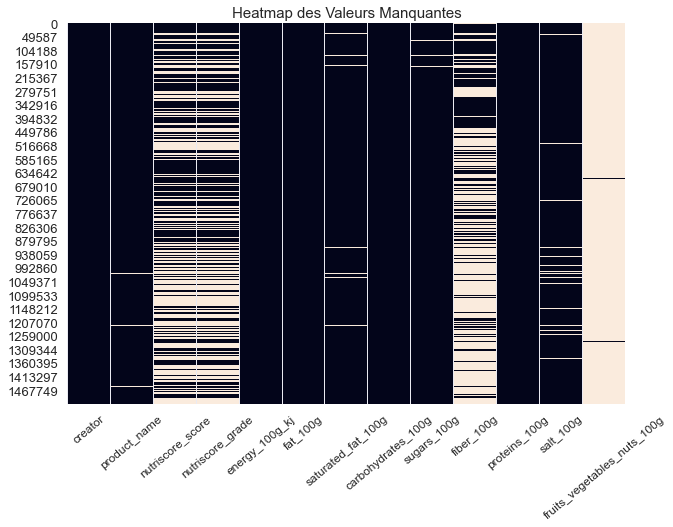

In [42]:
make_heatmap(open_food8, 40, 10, 7)


## Traitement de Valeurs Manquantes

In [43]:
open_food8.to_csv('open_food_forknn.csv')

In [44]:
from sklearn.impute import KNNImputer

# les valeurs sont distribuées dans l'espace et ont des voisins
def KNN_imputation(df, columns):
    knn_imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
    for column in columns:
        df[column] = knn_imputer.fit_transform(df[[column]])
    return df

# columns est la liste des colonnes que je veux imputer 
# n_neighbors est le nombre voisins que je regarde (et donc sur lesquels je fais la moyenne) 
# pour imputer ma valeur. 

In [45]:
import time
startTime = time.time()

open_food9 = KNN_imputation(open_food8, ['proteins_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))

Execution time in minutes: 1.45290713707606
Execution time in seconds: 87.1744282245636


In [46]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['fat_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))


Execution time in minutes: 2.9158350268999738
Execution time in seconds: 174.9501016139984


In [47]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['carbohydrates_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))

Execution time in minutes: 3.1520108501116435
Execution time in seconds: 189.1206510066986


In [48]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['sugars_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))

Execution time in minutes: 7.587377897898356
Execution time in seconds: 455.24267387390137


In [49]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['saturated_fat_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))


Execution time in minutes: 18.894218413035073
Execution time in seconds: 1133.6531047821045


In [51]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['salt_100g'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))

Execution time in minutes: 28.322951618830363
Execution time in seconds: 1699.3770971298218


In [52]:
startTime = time.time()

open_food9 = KNN_imputation(open_food9, ['energy_100g_kj'])

executionTime = (time.time() - startTime)
executionTimeMin = executionTime / 60
print('Execution time in minutes: ' + str(executionTimeMin))
print('Execution time in seconds: ' + str(executionTime))


Execution time in minutes: 1.0612614552179973
Execution time in seconds: 63.675687313079834


In [53]:
open_food9.to_csv('open_food_fornb2.csv')

In [64]:
nulls_df9 = vals_manquantes(open_food9)
nulls_df9.to_csv('missing_open_food9.csv')

print("Il y a:",open_food9.shape[0],"lignes et", open_food9.shape[1],"colonnes dans le dataframe.")

Il y a: 956486 lignes et 13 colonnes dans le dataframe.
